In [4]:
%run ./2_DataPreparation.ipynb

C:\Users\mike_\AppData\Local\Temp\ipykernel_2904\129421425.py:2: DtypeWarning: Columns (59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  health_locations = pd.read_csv(filename)
C:\Users\mike_\AppData\Local\Temp\ipykernel_2904\3500236455.py:2: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  wholesale = pd.read_csv(filename)
C:\Users\mike_\AppData\Local\Temp\ipykernel_2904\2127765340.py:2: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  construction = pd.read_csv(filename)
C:\Users\mike_\AppData\Local\Temp\ipykernel_2904\1436630130.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  goverment = pd.read_csv(filename)
C:\Users\mike_\AppData\Local\Temp\ipykernel_2904\2793973302.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

In [5]:
# Bring consolidated table
df = final_df

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5845 entries, 0 to 5844
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          4442 non-null   object 
 1   Alcaldia                       3711 non-null   object 
 2   ZipCode                        5845 non-null   object 
 3   FoodstandCount                 5845 non-null   int64  
 4   HealthStabishmentCount         5845 non-null   float64
 5   Wholesale_StabishmentCount     5845 non-null   float64
 6   Wholesale_AverageFlux          5845 non-null   float64
 7   Construction_StabishmentCount  5845 non-null   float64
 8   Construction_AverageFlux       5845 non-null   float64
 9   Corporate_StabishmentCount     5845 non-null   float64
 10  Corporate_AverageFlux          5845 non-null   float64
 11  Education_StabishmentCount     5845 non-null   float64
 12  Education_AverageFlux          5845 non-null   f

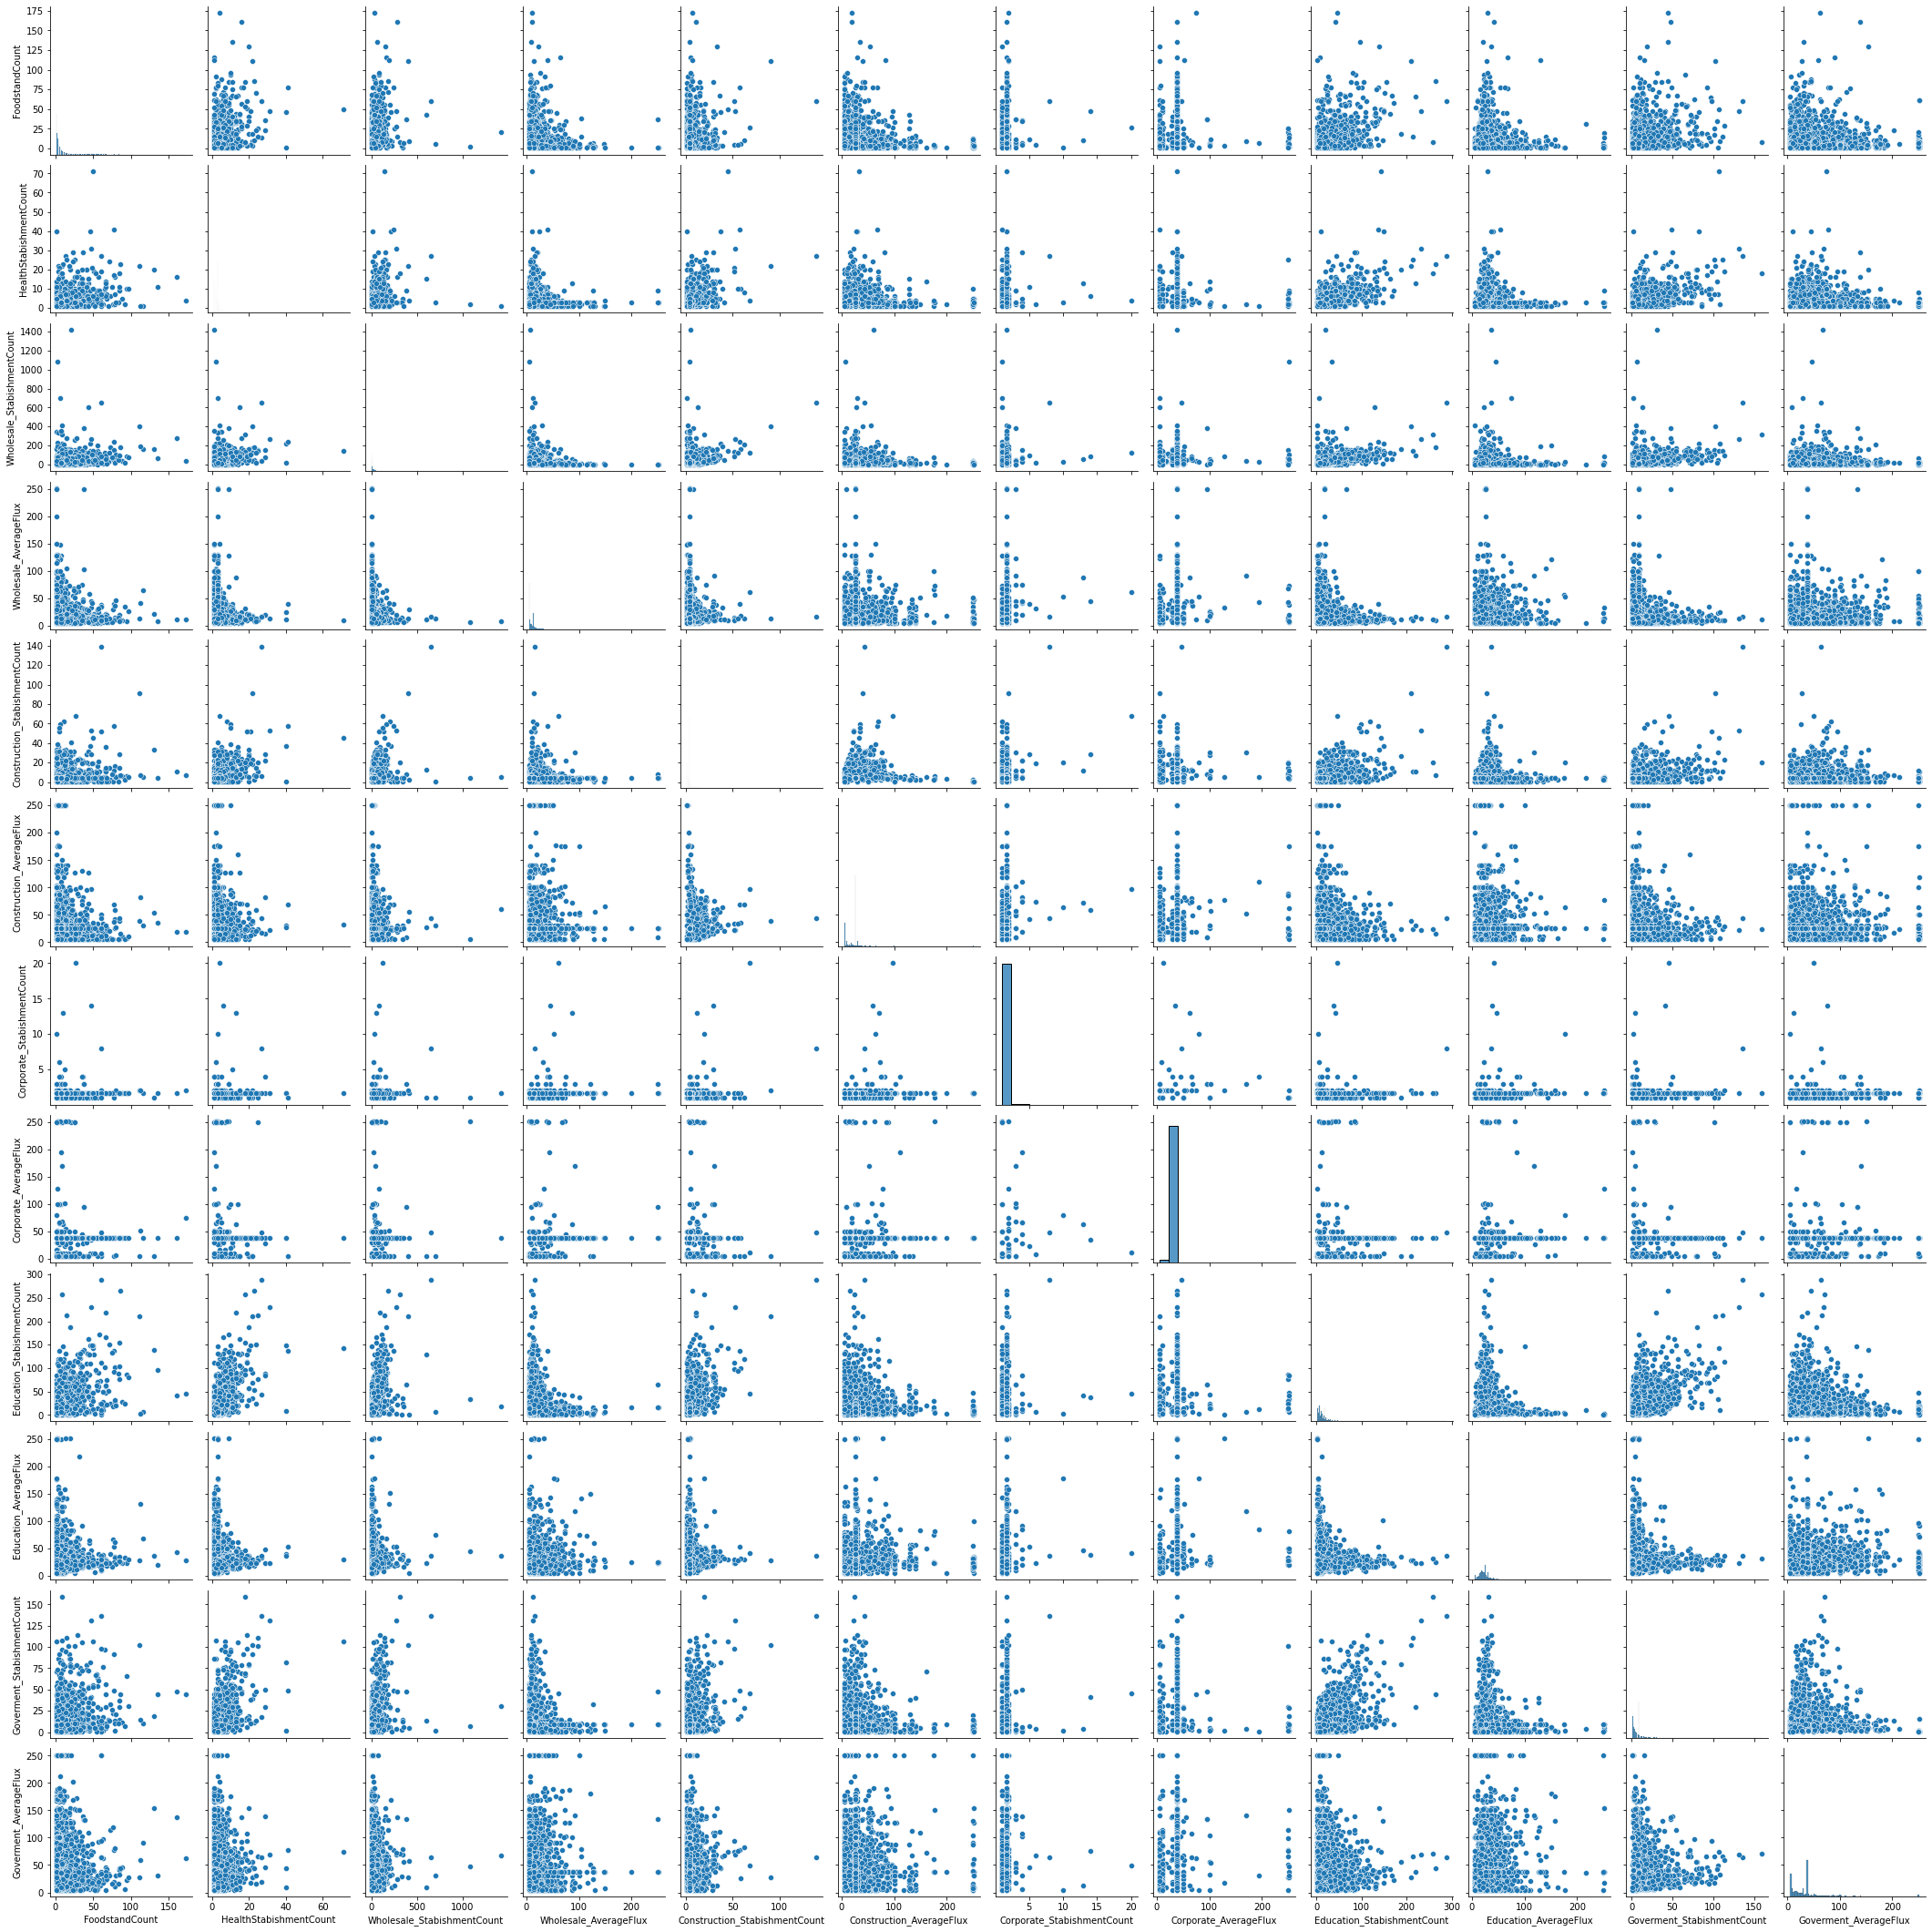

In [316]:
sns.pairplot(df)

In [6]:
# discard noise columns
tmp = df.drop(['State', 'Alcaldia', 'ZipCode'], axis=1)

# draw visuzlization
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = tmp.corr().columns,
        y = tmp.corr().index,
        z = np.array(df.corr()),
        text=df.corr().values,
        texttemplate='%{text:.2f}'
    )
)
fig.show()

In [317]:
df.corr().style.background_gradient(cmap='coolwarm')

,FoodstandCount,HealthStabishmentCount,Wholesale_StabishmentCount,Wholesale_AverageFlux,Construction_StabishmentCount,Construction_AverageFlux,Corporate_StabishmentCount,Corporate_AverageFlux,Education_StabishmentCount,Education_AverageFlux,Goverment_StabishmentCount,Goverment_AverageFlux
FoodstandCount,1.000000,0.386026,0.352882,0.055506,0.251836,-0.020616,0.042668,-0.016900,0.526189,0.069759,0.369112,0.067066
HealthStabishmentCount,0.386026,1.000000,0.361863,0.033851,0.432657,0.017748,0.028581,-0.016730,0.596423,0.042910,0.506463,0.063502
Wholesale_StabishmentCount,0.352882,0.361863,1.000000,0.032997,0.381930,0.019809,0.052091,0.066541,0.497735,0.049777,0.376670,0.058434
Wholesale_AverageFlux,0.055506,0.033851,0.032997,1.000000,0.064025,0.088845,0.093779,0.046540,0.007509,0.126090,0.006764,0.110040
Construction_StabishmentCount,0.251836,0.432657,0.381930,0.064025,1.000000,0.094068,0.220086,-0.022336,0.466646,0.056012,0.357607,0.093331
Construction_AverageFlux,-0.020616,0.017748,0.019809,0.088845,0.094068,1.000000,0.052115,0.023942,-0.017874,0.051298,-0.024179,0.059433
Corporate_StabishmentCount,0.042668,0.028581,0.052091,0.093779,0.220086,0.052115,1.000000,0.031842,0.028865,0.056095,0.049922,0.002896
Corporate_AverageFlux,-0.016900,-0.016730,0.066541,0.046540,-0.022336,0.023942,0.031842,1.000000,-0.008926,0.043841,-0.004384,0.008401
Education_StabishmentCount,0.526189,0.596423,0.497735,0.007509,0.466646,-0.017874,0.028865,-0.008926,1.000000,0.008684,0.580896,0.028870
Education_AverageFlux,0.069759,0.042910,0.049777,0.126090,0.056012,0.051298,0.056095,0.043841,0.008684,1.000000,0.014426,0.145922


In [318]:
# Checking for missing values
df.isna().sum()

State                            1403
Alcaldia                         2134
ZipCode                             0
FoodstandCount                      0
HealthStabishmentCount              0
Wholesale_StabishmentCount          0
Wholesale_AverageFlux               0
Construction_StabishmentCount       0
Construction_AverageFlux            0
Corporate_StabishmentCount          0
Corporate_AverageFlux               0
Education_StabishmentCount          0
Education_AverageFlux               0
Goverment_StabishmentCount          0
Goverment_AverageFlux               0
dtype: int64

In [319]:
# Train and Test Split
X = df[[
    'HealthStabishmentCount',
    'Wholesale_StabishmentCount',
    'Wholesale_AverageFlux',
    'Construction_StabishmentCount',
    'Construction_AverageFlux',
    'Corporate_StabishmentCount',
    'Corporate_AverageFlux',
    'Education_StabishmentCount',
    'Education_AverageFlux',
    'Goverment_StabishmentCount',
    'Goverment_AverageFlux'
    ]]

# scaler
scaler = preprocessing.StandardScaler().fit(X)
rescaledX = scaler.transform(X)

y = df.FoodstandCount
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [320]:
# Train and Test Split elements count
print(f'Train: {X_train.shape, y_train.shape}\
      \nTest: {X_test.shape, y_test.shape}\
      \nRowNCols: {df.shape[0], df.shape[1]}\
      ')

Train: ((4676, 11), (4676,))      
Test: ((1169, 11), (1169,))      
RowNCols: (5845, 15)      


In [321]:
# Extract the descriptive statistics for the explanatory variables for IQR calculation
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
HealthStabishmentCount,4676.0,3.094826,2.835824,1.0,2.000000,3.102217,3.102217,71.0
Wholesale_StabishmentCount,4676.0,20.165886,41.351435,1.0,4.000000,11.000000,20.195385,1419.0
Wholesale_AverageFlux,4676.0,13.141592,14.664213,5.0,5.000000,8.716247,13.188562,251.0
Construction_StabishmentCount,4676.0,4.383506,4.755996,1.0,2.000000,4.397405,4.397405,139.0
Construction_AverageFlux,4676.0,25.309891,24.035508,5.0,13.333333,25.558209,25.558209,251.0
Corporate_StabishmentCount,4676.0,1.704926,0.400151,1.0,1.705882,1.705882,1.705882,20.0
Corporate_AverageFlux,4676.0,38.527584,11.808297,5.0,38.527568,38.527568,38.527568,251.0
Education_StabishmentCount,4676.0,16.539204,20.123777,1.0,5.000000,11.000000,19.000000,288.0
Education_AverageFlux,4676.0,25.240390,18.917828,5.0,16.428571,21.818182,28.333333,251.0
Goverment_StabishmentCount,4676.0,8.832717,11.399403,1.0,2.000000,7.000000,8.863125,136.0


In [322]:
"""
Uncomment to remove outliers

# Extracting the quantiles
HealthStabishmentCount_25 = X_train.describe().T.loc['HealthStabishmentCount', '25%']
HealthStabishmentCount_75 = X_train.describe().T.loc['HealthStabishmentCount', '75%']

# Calculate IQRs
IQR_HealthStabishmentCount = 1.5 * (HealthStabishmentCount_75 - HealthStabishmentCount_25)

# Remove outliers from the variable 'HealthStabishmentCount'
X_train = X_train.query(' HealthStabishmentCount >= (@HealthStabishmentCount_25 - @IQR_HealthStabishmentCount)\
     & HealthStabishmentCount <= (@HealthStabishmentCount_75 + @IQR_HealthStabishmentCount) ')
y_train = y_train[X_train.index]

"""

"\nUncomment to remove outliers\n\n# Extracting the quantiles\nHealthStabishmentCount_25 = X_train.describe().T.loc['HealthStabishmentCount', '25%']\nHealthStabishmentCount_75 = X_train.describe().T.loc['HealthStabishmentCount', '75%']\n\n# Calculate IQRs\nIQR_HealthStabishmentCount = 1.5 * (HealthStabishmentCount_75 - HealthStabishmentCount_25)\n\n# Remove outliers from the variable 'HealthStabishmentCount'\nX_train = X_train.query(' HealthStabishmentCount >= (@HealthStabishmentCount_25 - @IQR_HealthStabishmentCount)     & HealthStabishmentCount <= (@HealthStabishmentCount_75 + @IQR_HealthStabishmentCount) ')\ny_train = y_train[X_train.index]\n\n"

Text(0.5, 1.0, 'Boxplot of IQR_Goverment_AverageFlux')

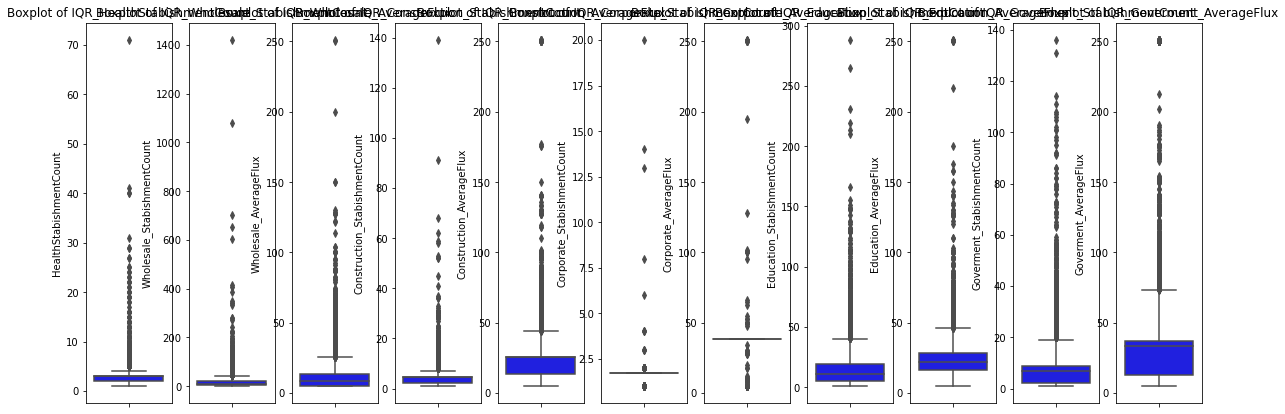

In [323]:
# setup figure
fig, ax = plt.subplots(1, 11, figsize=(20,7))

features = [
    'HealthStabishmentCount',
    'Wholesale_StabishmentCount',
    'Wholesale_AverageFlux',
    'Construction_StabishmentCount',
    'Construction_AverageFlux',
    'Corporate_StabishmentCount',
    'Corporate_AverageFlux',
    'Education_StabishmentCount',
    'Education_AverageFlux',
    'Goverment_StabishmentCount',
    'Goverment_AverageFlux'
    ]
# plot1
g1 = sns.boxplot(y=X_train.HealthStabishmentCount, color='blue', ax=ax[0])
g1.set_title('Boxplot of IQR_HealthStabishmentCount')

# plot2
g2 = sns.boxplot(y=X_train.Wholesale_StabishmentCount, color='blue', ax=ax[1])
g2.set_title('Boxplot of IQR_Wholesale_StabishmentCount')

# plot3
g3 = sns.boxplot(y=X_train.Wholesale_AverageFlux, color='blue', ax=ax[2])
g3.set_title('Boxplot of IQR_Wholesale_AverageFlux')

# plot4
g4 = sns.boxplot(y=X_train.Construction_StabishmentCount, color='blue', ax=ax[3])
g4.set_title('Boxplot of IQR_Construction_StabishmentCount')

# plot5
g5 = sns.boxplot(y=X_train.Construction_AverageFlux, color='blue', ax=ax[4])
g5.set_title('Boxplot of IQR_Construction_AverageFlux')

# plot6
g6 = sns.boxplot(y=X_train.Corporate_StabishmentCount, color='blue', ax=ax[5])
g6.set_title('Boxplot of IQR_Corporate_StabishmentCount')

# plot7
g7 = sns.boxplot(y=X_train.Corporate_AverageFlux, color='blue', ax=ax[6])
g7.set_title('Boxplot of IQR_Corporate_AverageFlux')

# plot8
g8 = sns.boxplot(y=X_train.Education_StabishmentCount, color='blue', ax=ax[7])
g8.set_title('Boxplot of IQR_Education_StabishmentCount')

# plot9
g9 = sns.boxplot(y=X_train.Education_AverageFlux, color='blue', ax=ax[8])
g9.set_title('Boxplot of IQR_Education_AverageFlux')

# plot10
g10 = sns.boxplot(y=X_train.Goverment_StabishmentCount, color='blue', ax=ax[9])
g10.set_title('Boxplot of IQR_Goverment_StabishmentCount')

# plot11
g11 = sns.boxplot(y=X_train.Goverment_AverageFlux, color='blue', ax=ax[10])
g11.set_title('Boxplot of IQR_Goverment_AverageFlux')


In [324]:
#

#### Train a Linear Regression Model

In [325]:
# Instance and fit
lr_model = LinearRegression().fit(X_train, y_train)

# Score
score_lr = lr_model.score(X_test, y_test)
score_lr

0.22892825279584683

#### Train a Linear Regression Model with Log Transformation

In [326]:
# Log transformation
X_log = np.log(X_train)
y_log = np.log(y_train)

# Instance and fit
lrLog_model = LinearRegression().fit(X_log, y_log)

# Remove zeroes
X_test_log = X_test[(X_test.HealthStabishmentCount > 0)]
y_test_log = y_test[X_test_log.index]

# Log Transform X_test and y test
X_test_log = np.log(X_test_log)
y_test_log = np.log(y_test_log)

# Score
score_log = lrLog_model.score(X_test_log, y_test_log)
score_log

0.2681772714094104

In [327]:
# Predictions
preds = lrLog_model.predict(X_test_log)

# Performance
pd.DataFrame({ 'True Value': np.exp(y_test_log),
               'Prediction': np.exp(preds)}).head(5)

,True Value,Prediction
5687,5.0,1.398586
5659,4.0,4.677997
2317,1.0,8.513360
5525,5.0,6.796949
681,5.0,2.737231


#### Train a KNN Regression Model with Log Transformation

In [328]:
# Instance and fit
knn_model = KNeighborsRegressor(n_neighbors=9).fit(X_train, y_train)

# Score
score_knn = knn_model.score(X_test, y_test)
score_knn

0.18525913804610838

In [329]:
# Predictions
preds = knn_model.predict(X_test)

# Performance
performance = pd.DataFrame({ 'True Value': y_test,
                            'Prediction': preds,
                            'Error': preds-y_test})
# View
performance

,True Value,Prediction,Error
5687,5,9.888889,4.888889
5659,4,6.444444,2.444444
2317,1,20.666667,19.666667
5525,5,10.444444,5.444444
681,5,1.666667,-3.333333
...,...,...,...
2025,1,1.333333,0.333333
3258,3,4.888889,1.888889
5713,2,3.222222,1.222222
3704,1,3.888889,2.888889


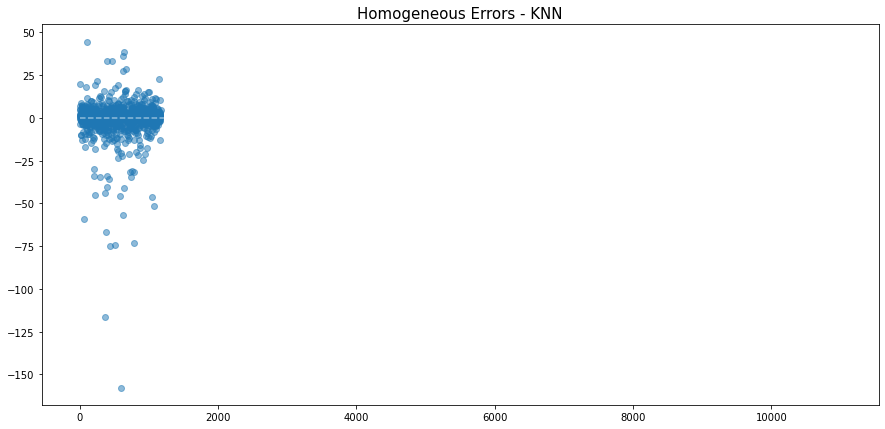

In [330]:
plt.figure(figsize=(15,7))
# Errors
ax_x= performance['True Value']
ax_y= performance['Prediction']
yerr= performance['Error']

plt.scatter(range(len(yerr)), yerr, alpha=.5)
plt.title('Homogeneous Errors - KNN', size=15);
plt.hlines(y=0, xmin=0, xmax=11000, linestyle='--', color='white', alpha=.5);
#plt.ylim(-.3, .3);

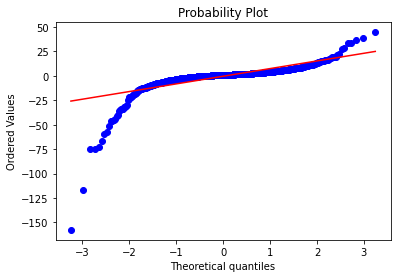

In [331]:
#QQ Plot
probplot(yerr, dist='norm', plot=plt);

In [332]:
# Predictions
preds = lrLog_model.predict(X_test_log)

# Performance
LR_log_performance = pd.DataFrame({ 'True Value': np.exp(y_test_log),
                                   'Prediction': np.exp(preds),
                                   'Error': np.exp(y_test_log) - np.exp(preds)})

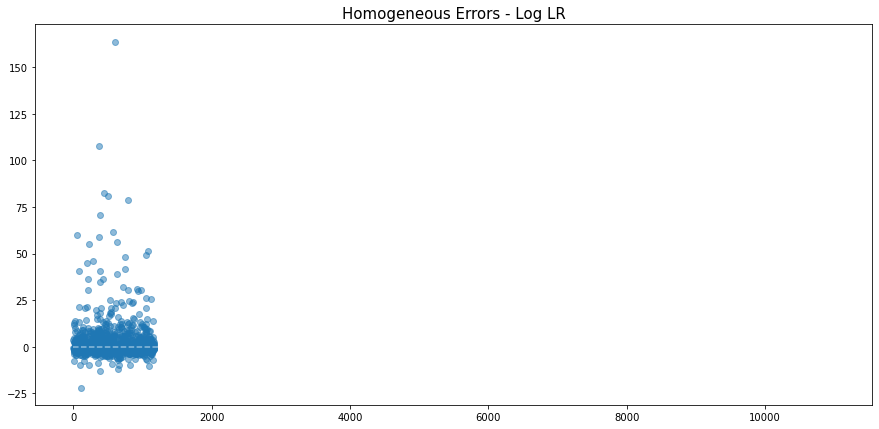

In [333]:
plt.figure(figsize=(15,7))
# Errors
ax_x= LR_log_performance['True Value']
ax_y= LR_log_performance['Prediction']
yerr= LR_log_performance['Error']

plt.scatter(range(len(yerr)), yerr, alpha=.5)
plt.title('Homogeneous Errors - Log LR', size=15);
plt.hlines(y=0, xmin=0, xmax=11000, linestyle='--', color='white', alpha=.5);
#plt.ylim(-.3, .3);

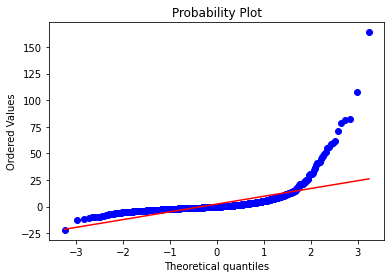

In [334]:
# QQ Plot
probplot(yerr, dist='norm', plot=plt);

In [335]:
pd.DataFrame({'Linear Regression':[score_lr],
              'Log_Linear Regression': [score_log],
              'KNN Regression': [score_knn]})

,Linear Regression,Log_Linear Regression,KNN Regression
0,0.228928,0.268177,0.185259
